# Esports Earnings pt.2 Regional Stats & KNN Model

In [1]:
# ImportData Analysis environment

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
pdf = pd.read_csv(r"C:\Users\jdgoe\Downloads\highest_earning_players.csv") # players data frame
cntry = pd.read_csv(r'C:\Users\jdgoe\Downloads\country-and-continent-codes-list.csv') # country data frame

In [3]:
pdf.head()

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter


In [4]:
cntry.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0


## Data Cleaning

In [5]:
cntry.dtypes

Continent_Name                object
Continent_Code                object
Country_Name                  object
Two_Letter_Country_Code       object
Three_Letter_Country_Code     object
Country_Number               float64
dtype: object

In [6]:
pdf.dtypes

PlayerId           int64
NameFirst         object
NameLast          object
CurrentHandle     object
CountryCode       object
TotalUSDPrize    float64
Game              object
Genre             object
dtype: object

In [7]:
#make prize money an integer
pdf['TotalUSDPrize'] = pdf['TotalUSDPrize'].astype('int64')

In [8]:
#check for null data
pdf.isnull().value_counts()

PlayerId  NameFirst  NameLast  CurrentHandle  CountryCode  TotalUSDPrize  Game   Genre
False     False      False     False          False        False          False  False    1000
dtype: int64

In [9]:
cntry.isnull().sum()

Continent_Name                0
Continent_Code               43
Country_Name                  0
Two_Letter_Country_Code       1
Three_Letter_Country_Code     4
Country_Number                4
dtype: int64

I see Namibia in row 152 is labeled as a null value when the 2-letter country code should be "NA"

In [10]:
cntry.at[152,'Two_Letter_Country_Code']='NA' # change specific cell to hold actual Two letter country code
cntry

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0
...,...,...,...,...,...,...
257,Africa,AF,"Zambia, Republic of",ZM,ZMB,894.0
258,Oceania,OC,Disputed Territory,XX,NaN,NaN
259,Asia,AS,Iraq-Saudi Arabia Neutral Zone,XE,NaN,NaN
260,Asia,AS,United Nations Neutral Zone,XD,NaN,NaN


### Top 15 players and where they are from

In [11]:
pdf = pdf.sort_values(by='TotalUSDPrize',ascending=False, ignore_index=True)
pdf.head(15)

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3304,Johan,Sundstein,N0tail,dk,6952596,Dota 2,Multiplayer Online Battle Arena
1,3822,Jesse,Vainikka,JerAx,fi,6470000,Dota 2,Multiplayer Online Battle Arena
2,30451,Anathan,Pham,ana,au,6000411,Dota 2,Multiplayer Online Battle Arena
3,2811,Sébastien,Debs,Ceb,fr,5554297,Dota 2,Multiplayer Online Battle Arena
4,18897,Topias,Taavitsainen,Topson,fi,5470902,Dota 2,Multiplayer Online Battle Arena
5,3145,Kuro,Takhasomi,KuroKy,de,5193382,Dota 2,Multiplayer Online Battle Arena
6,14671,Amer,Al-Barkawi,Miracle-,jo,4798043,Dota 2,Multiplayer Online Battle Arena
7,12579,Ivan,Ivanov,MinD_ContRoL,bg,4579118,Dota 2,Multiplayer Online Battle Arena
8,25335,Maroun,Merhej,GH,lb,4193412,Dota 2,Multiplayer Online Battle Arena
9,12133,Lasse,Urpalainen,Matumbaman,fi,3765369,Dota 2,Multiplayer Online Battle Arena


All but one of the top 15 players is playing DOTA 2, a multiplayer online battle arena. The one other is playing Fortnite, a Battle Royale.

Let's plot this now.


In [13]:
top15_handle = pdf.sort_values(by='TotalUSDPrize',ascending=False, ignore_index=True)[:20].reset_index()

Text(0.5, 1.0, 'Top 15 Earners (Current Handle)')

c:\Users\jdgoe\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20022 (\N{CJK UNIFIED IDEOGRAPH-4E36}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


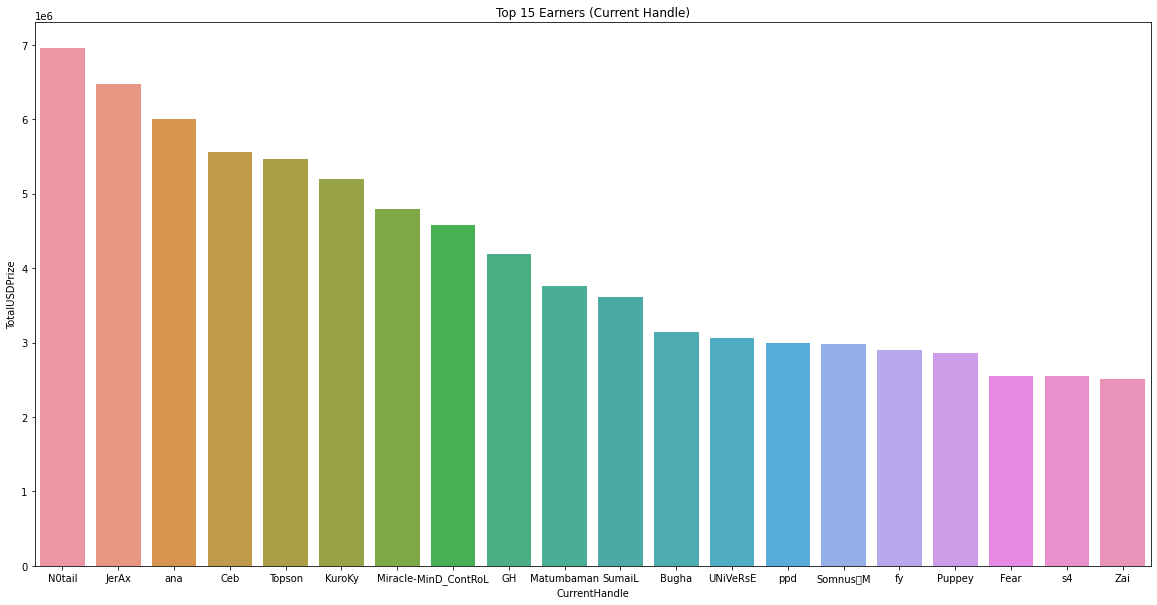

In [14]:
plt.figure(figsize=(20,10))
sns.barplot(x=top15_handle['CurrentHandle'], y=top15_handle['TotalUSDPrize'])
plt.title('Top 15 Earners (Current Handle)')

View what countries are on the list

In [20]:
# Get country name from country code
def country_name(code):
    code = code.upper()
    name = cntry[cntry['Two_Letter_Country_Code']==code]['Country_Name'].to_string(index=False)
    return name

In [21]:
# new column in players table with country name
pdf['CountryName'] = pdf['CountryCode'].apply(country_name)

In [25]:
pdf

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre,CountryName
0,3304,Johan,Sundstein,N0tail,dk,6952596,Dota 2,Multiplayer Online Battle Arena,"Denmark, Kingdom of"
1,3822,Jesse,Vainikka,JerAx,fi,6470000,Dota 2,Multiplayer Online Battle Arena,"Finland, Republic of"
2,30451,Anathan,Pham,ana,au,6000411,Dota 2,Multiplayer Online Battle Arena,"Australia, Commonwealth of"
3,2811,Sébastien,Debs,Ceb,fr,5554297,Dota 2,Multiplayer Online Battle Arena,"France, French Republic"
4,18897,Topias,Taavitsainen,Topson,fi,5470902,Dota 2,Multiplayer Online Battle Arena,"Finland, Republic of"
...,...,...,...,...,...,...,...,...,...
995,83084,Tseng-Yung,Chun,Kato,tw,26666,Arena of Valor,Multiplayer Online Battle Arena,Taiwan
996,83085,En Hao,Chen,Gua,tw,26666,Arena of Valor,Multiplayer Online Battle Arena,Taiwan
997,70343,-,-,Rain,tw,26645,Arena of Valor,Multiplayer Online Battle Arena,Taiwan
998,12241,Komklit,Wongsawat,O7T-V1,th,25941,Arena of Valor,Multiplayer Online Battle Arena,"Thailand, Kingdom of"


Lets do the same for Continent

In [26]:
def continent(code):
    code = code.upper()
    name = cntry[cntry['Two_Letter_Country_Code']==code]['Continent_Name'].to_string(index=False)
    return name 

In [27]:
pdf['Continent'] = pdf['CountryCode'].apply(continent)
pdf

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre,CountryName,Continent
0,3304,Johan,Sundstein,N0tail,dk,6952596,Dota 2,Multiplayer Online Battle Arena,"Denmark, Kingdom of",Europe
1,3822,Jesse,Vainikka,JerAx,fi,6470000,Dota 2,Multiplayer Online Battle Arena,"Finland, Republic of",Europe
2,30451,Anathan,Pham,ana,au,6000411,Dota 2,Multiplayer Online Battle Arena,"Australia, Commonwealth of",Oceania
3,2811,Sébastien,Debs,Ceb,fr,5554297,Dota 2,Multiplayer Online Battle Arena,"France, French Republic",Europe
4,18897,Topias,Taavitsainen,Topson,fi,5470902,Dota 2,Multiplayer Online Battle Arena,"Finland, Republic of",Europe
...,...,...,...,...,...,...,...,...,...,...
995,83084,Tseng-Yung,Chun,Kato,tw,26666,Arena of Valor,Multiplayer Online Battle Arena,Taiwan,Asia
996,83085,En Hao,Chen,Gua,tw,26666,Arena of Valor,Multiplayer Online Battle Arena,Taiwan,Asia
997,70343,-,-,Rain,tw,26645,Arena of Valor,Multiplayer Online Battle Arena,Taiwan,Asia
998,12241,Komklit,Wongsawat,O7T-V1,th,25941,Arena of Valor,Multiplayer Online Battle Arena,"Thailand, Kingdom of",Asia


In [28]:
#check for null values
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PlayerId       1000 non-null   int64 
 1   NameFirst      1000 non-null   object
 2   NameLast       1000 non-null   object
 3   CurrentHandle  1000 non-null   object
 4   CountryCode    1000 non-null   object
 5   TotalUSDPrize  1000 non-null   int64 
 6   Game           1000 non-null   object
 7   Genre          1000 non-null   object
 8   CountryName    1000 non-null   object
 9   Continent      1000 non-null   object
dtypes: int64(2), object(8)
memory usage: 78.2+ KB


Some countries have unneccessary aspects of their name showing, for instance 'Chile, Republic of' should be simplified to "Chile". Seems that we can simplify this by extracting the first peice of the string and removing everyhting after the comma.

In [30]:
def name_cleaning(country):
    country = country.split(',')
    return country[0]

In [31]:
pdf['CountryName'] = pdf['CountryName'].apply(name_cleaning)
pdf['CountryName'].unique()

array(['Denmark', 'Finland', 'Australia', 'France', 'Germany', 'Jordan',
       'Bulgaria', 'Lebanon', 'Pakistan', 'United States of America',
       'China', 'Estonia', 'Sweden', 'Israel', 'Romania', 'Canada',
       'Austria', 'Malaysia', 'Russian Federation\nRussian Federation',
       'Ukraine', 'Singapore', 'Norway', 'Macao',
       'United Kingdom of Great Britain & Northern Ireland', 'Korea',
       'Netherlands', 'Hong Kong', 'Brazil', 'Macedonia', 'Argentina',
       'Poland', 'Philippines', 'Slovakia (Slovak Republic)',
       'Bosnia and Herzegovina', 'Belarus', 'Taiwan', 'Croatia',
       'Kazakhstan', 'Switzerland', 'Mexico', 'Belgium', 'Czech Republic',
       'Turkey', 'Italy', 'Latvia', 'Spain', 'Japan', 'Uzbekistan',
       'Slovenia', 'Vietnam', 'Lithuania', 'Thailand', 'Ireland',
       'Gibraltar', 'Greece', 'Cuba'], dtype=object)

Now to see Total prize money by country

In [32]:
pdf.groupby('CountryName').sum().sort_values(by='TotalUSDPrize',ascending=False).head(10)

,PlayerId,TotalUSDPrize
CountryName,,
China,5664520,72391794
Korea,5868517,58441617
United States of America,3873584,43099336
Denmark,668636,26840785
Sweden,739471,20770402
Finland,372048,18876257
France,794412,15803220
Canada,1058629,13483633
Russian Federation\nRussian Federation,633809,10822883


In [36]:
# Graph Top ten Country Earnings

T10Countries = pdf.groupby('CountryName').sum().sort_values(by='TotalUSDPrize',ascending=False)[:10].reset_index()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'China'),
  Text(1, 0, 'Korea'),
  Text(2, 0, 'United States of America'),
  Text(3, 0, 'Denmark'),
  Text(4, 0, 'Sweden'),
  Text(5, 0, 'Finland'),
  Text(6, 0, 'France'),
  Text(7, 0, 'Canada'),
  Text(8, 0, 'Russian Federation\nRussian Federation'),
  Text(9, 0, 'Germany')])

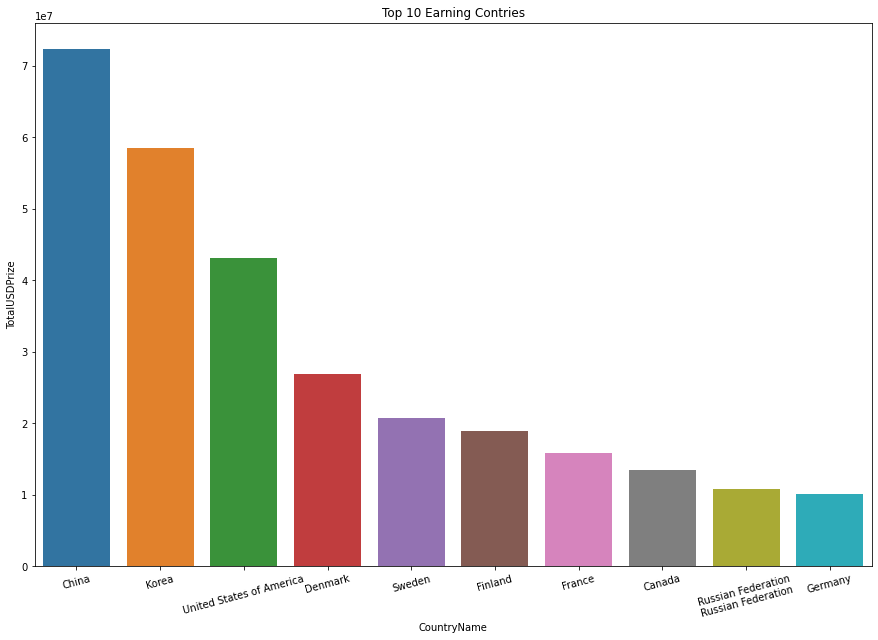

In [40]:
plt.figure(figsize=(15,10))
sns.barplot(x=T10Countries['CountryName'], y=T10Countries['TotalUSDPrize'])
plt.title('Top 10 Earning Contries')
plt.xticks(rotation=15)

In [35]:
# average prize money per country
pdf.groupby('CountryName').mean().sort_values(by='TotalUSDPrize',ascending=False).head(10)

,PlayerId,TotalUSDPrize
CountryName,,
Lebanon,25335.0,4.193412e+06
Pakistan,14196.0,3.608317e+06
Jordan,14671.5,3.165870e+06
Estonia,17086.0,1.685007e+06
Australia,34938.0,1.599934e+06
Singapore,1949.0,1.553261e+06
Macao,2598.0,1.337308e+06
Romania,10728.5,1.239837e+06
Israel,21962.5,1.232344e+06


In [41]:
T10_avg_Country = pdf.groupby('CountryName').mean().sort_values(by='TotalUSDPrize',ascending=False)[:10].reset_index()

Text(0, 0.5, 'Total Prize $ (USD)')

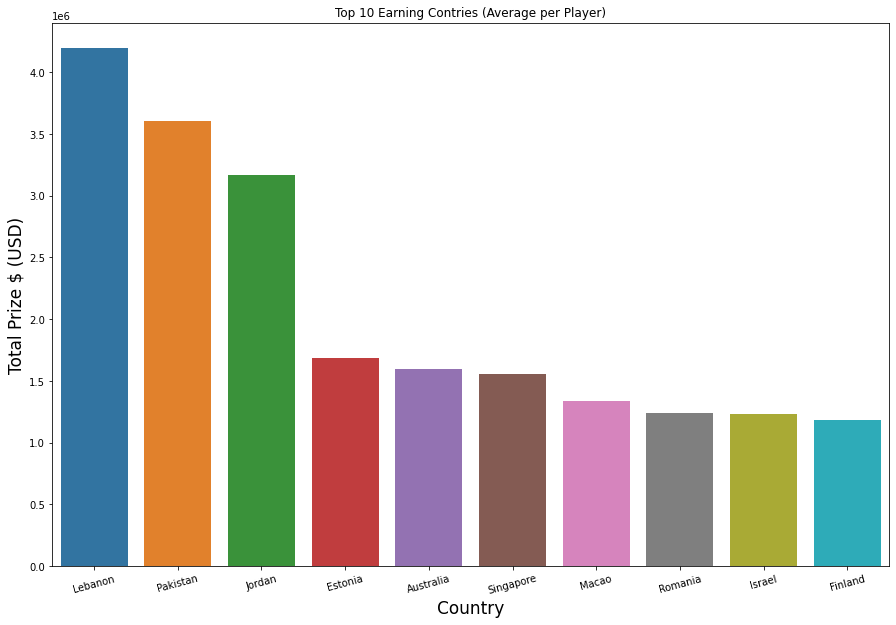

In [43]:
plt.figure(figsize=(15,10))
sns.barplot(x=T10_avg_Country['CountryName'], y=T10_avg_Country['TotalUSDPrize'])
plt.title('Top 10 Earning Contries (Average per Player)')
plt.xticks(rotation=15)
plt.xlabel('Country', size = 17)
plt.ylabel('Total Prize $ (USD)', size = 17)

### Merge tables and find amount of players per country

In [44]:
cntry = cntry.rename(columns={'Two_Letter_Country_Code' : 'CountryCode'})
pdf['CountryCode'] = pdf['CountryCode'].apply(lambda x: x.upper())
df_new = pd.merge(pdf, cntry, how='left', on='CountryCode')

In [65]:
df_new.head()

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre,CountryName,Continent,Continent_Name,Continent_Code,Country_Name,Three_Letter_Country_Code,Country_Number
0,3304,Johan,Sundstein,N0tail,DK,6952596,Dota 2,Multiplayer Online Battle Arena,Denmark,Europe,Europe,EU,Denmark,DNK,208.0
1,3822,Jesse,Vainikka,JerAx,FI,6470000,Dota 2,Multiplayer Online Battle Arena,Finland,Europe,Europe,EU,Finland,FIN,246.0
2,30451,Anathan,Pham,ana,AU,6000411,Dota 2,Multiplayer Online Battle Arena,Australia,Oceania,Oceania,OC,Australia,AUS,36.0
3,2811,Sébastien,Debs,Ceb,FR,5554297,Dota 2,Multiplayer Online Battle Arena,France,Europe,Europe,EU,France,FRA,250.0
4,18897,Topias,Taavitsainen,Topson,FI,5470902,Dota 2,Multiplayer Online Battle Arena,Finland,Europe,Europe,EU,Finland,FIN,246.0


In [66]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032 entries, 0 to 1031
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerId                   1032 non-null   int64  
 1   NameFirst                  1032 non-null   object 
 2   NameLast                   1032 non-null   object 
 3   CurrentHandle              1032 non-null   object 
 4   CountryCode                1032 non-null   object 
 5   TotalUSDPrize              1032 non-null   int64  
 6   Game                       1032 non-null   object 
 7   Genre                      1032 non-null   object 
 8   CountryName                1032 non-null   object 
 9   Continent                  1032 non-null   object 
 10  Continent_Name             1032 non-null   object 
 11  Continent_Code             879 non-null    object 
 12  Country_Name               1032 non-null   object 
 13  Three_Letter_Country_Code  1032 non-null   objec

In [53]:
def name_cleaning(country):
    country = country.split(',')
    return country[0]

In [56]:
# apply name cleaning
df_new['Country_Name'] = df_new['Country_Name'].apply(name_cleaning)

In [57]:
player_country = pd.DataFrame(df_new.groupby('Country_Name')['PlayerId'].count().sort_values(ascending=False).reset_index()).head(10)
player_country

,Country_Name,PlayerId
0,Korea,251
1,China,168
2,United States of America,114
3,Sweden,45
4,Russian Federation,44
5,France,37
6,Canada,37
7,Denmark,36
8,Taiwan,34
9,Germany,30


### Creat world map with player count distribution

In [58]:
import folium
from folium.plugins import MarkerCluster

In [62]:
player_country_3 = pd.DataFrame(df_new.groupby('Three_Letter_Country_Code')['PlayerId'].count().sort_values(ascending=False).reset_index())

country_geo = r"C:\Users\jdgoe\OneDrive\Documents\Analyses\world-countries.json"

player_map = folium.Map(location=[0, 0], zoom_start=2)

folium.Choropleth(geo_data = country_geo,
                 data=player_country_3,
                 columns=['Three_Letter_Country_Code', 'PlayerId'],
                 key_on='feature.id',
                 fill_color='YlOrRd',
                 fill_opacity=0.7,
                 line_opacity=0.2,
                 legend_name='Players by each Country'
                 ).add_to(player_map)

player_map

In [68]:
df_numerized = df_new

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre,CountryName,Continent,Continent_Name,Continent_Code,Country_Name,Three_Letter_Country_Code,Country_Number
0,3304,319,521,485,14,6952596,2,3,13,1,1,1,13,14,208.0
1,3822,292,560,344,17,6470000,2,3,15,1,1,1,15,17,246.0
2,30451,19,435,815,2,6000411,2,3,1,4,3,2,1,1,36.0
3,2811,624,119,108,18,5554297,2,3,16,1,1,1,16,18,250.0
4,18897,656,528,723,17,5470902,2,3,15,1,1,1,15,17,246.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,83084,660,102,362,51,26666,0,3,48,0,0,0,48,51,158.0
1028,83085,155,91,268,51,26666,0,3,48,0,0,0,48,51,158.0
1029,70343,0,0,568,51,26645,0,3,48,0,0,0,48,51,158.0
1030,12241,391,592,521,49,25941,0,3,49,0,0,0,49,49,764.0


In [69]:
df_new.columns

Index(['PlayerId', 'NameFirst', 'NameLast', 'CurrentHandle', 'CountryCode',
       'TotalUSDPrize', 'Game', 'Genre', 'CountryName', 'Continent',
       'Continent_Name', 'Continent_Code', 'Country_Name',
       'Three_Letter_Country_Code', 'Country_Number'],
      dtype='object')

## KNN Model

First, remove outliers from the data.

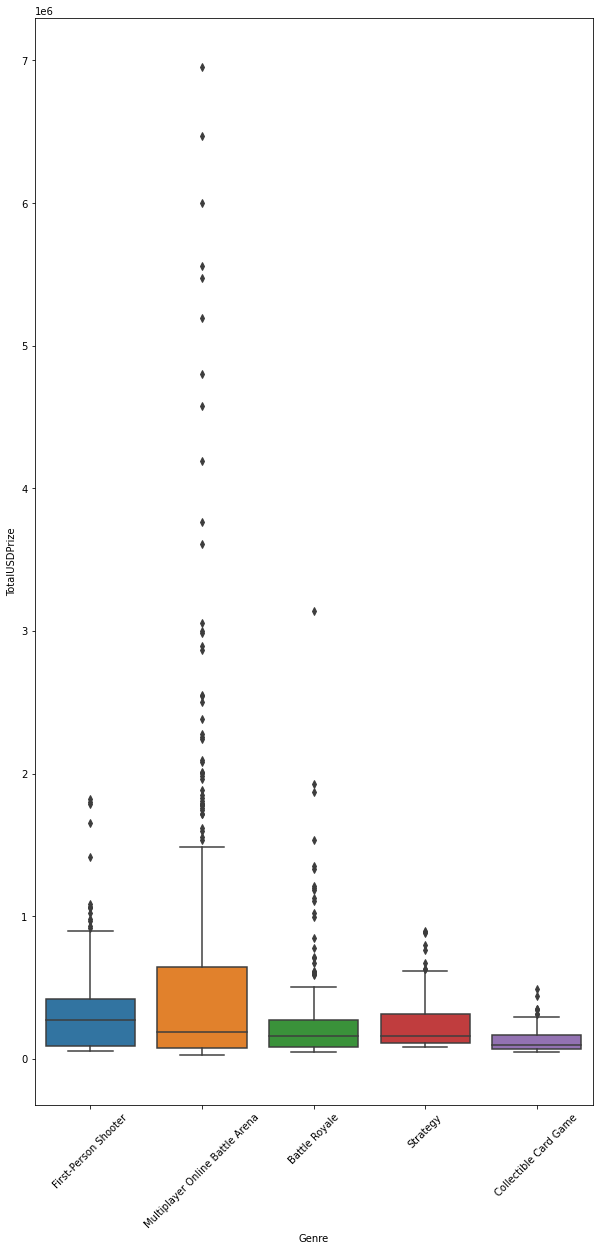

In [129]:
fig, ax = plt.subplots(figsize=(10,20))
plt.xticks(rotation = 45)
sns.boxplot(x='Genre',y='TotalUSDPrize',data=df_new)
plt.show()

Mostly everything over $2,000,000 is an outlier.

In [ ]:
players_knn = df_new[df_new['TotalUSDPrize'] < 2000000]
players_knn

Let's look at the median as a success point for being an esports player

In [133]:
players_knn.median()

C:\Users\jdgoe\AppData\Local\Temp\ipykernel_15264\1189724661.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  players_knn.median()


PlayerId           25047.00
TotalUSDPrize     164811.62
Country_Number       410.00
dtype: float64

In [178]:
# Engineer outcome for KNN

def outcome(prize):
    if prize > 164611.62:
        return 1
    else:
        return 0

In [179]:
players_knn['Outcome'] = df_new['TotalUSDPrize'].apply(outcome)
players_knn

C:\Users\jdgoe\AppData\Local\Temp\ipykernel_15264\1595790498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_knn['Outcome'] = df_new['TotalUSDPrize'].apply(outcome)


,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre,Continent_Name,Continent_Code,Country_Name,Three_Letter_Country_Code,Country_Number,Outcome,PlayerScore
0,3883,Peter,Rasmussen,dupreeh,DK,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,Denmark,DNK,208.0,1,0.95
1,3679,Andreas,Højsleth,Xyp9x,DK,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,Denmark,DNK,208.0,1,0.95
2,3885,Nicolai,Reedtz,dev1ce,DK,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,Denmark,DNK,208.0,1,0.95
3,3672,Lukas,Rossander,gla1ve,DK,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,Denmark,DNK,208.0,1,0.95
4,17800,Emil,Reif,Magisk,DK,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,Denmark,DNK,208.0,1,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,7400,Janne,Mikkonen,Savjz,FI,50734.44,Hearthstone,Collectible Card Game,Europe,EU,Finland,FIN,246.0,0,0.40
1028,3255,Drew,Biessener,Tidesoftime,US,50449.60,Hearthstone,Collectible Card Game,North America,NaN,United States of America,USA,840.0,0,0.30
1029,49164,Simone,Liguori,Leta,IT,49300.00,Hearthstone,Collectible Card Game,Europe,EU,Italy,ITA,380.0,0,0.15
1030,43043,Mike,Eichner,Ike,US,48550.00,Hearthstone,Collectible Card Game,North America,NaN,United States of America,USA,840.0,0,0.30


In [168]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [180]:
predictors = ['Game','Genre','Country_Name','Continent_Name']
Outcome = 'Outcome'

In [181]:
X = players_knn[predictors]
y = players_knn[Outcome]

In [182]:
# use LabelEncoder top transform the string to numerical values

game_le = LabelEncoder()
genre_le = LabelEncoder()
country_le = LabelEncoder()
continent_le = LabelEncoder()

In [183]:
X['Game'] = game_le.fit_transform(X['Game'])
X['Genre'] = genre_le.fit_transform(X['Genre'])
X['Country_Name'] = country_le.fit_transform(X['Country_Name'])
X['Continent_Name'] = continent_le.fit_transform(X['Continent_Name'])
X

C:\Users\jdgoe\AppData\Local\Temp\ipykernel_15264\1436982872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Game'] = game_le.fit_transform(X['Game'])
C:\Users\jdgoe\AppData\Local\Temp\ipykernel_15264\1436982872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Genre'] = genre_le.fit_transform(X['Genre'])
C:\Users\jdgoe\AppData\Local\Temp\ipykernel_15264\1436982872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

,Game,Genre,Country_Name,Continent_Name
0,1,2,13,1
1,1,2,13,1
2,1,2,13,1
3,1,2,13,1
4,1,2,13,1
...,...,...,...,...
1027,4,1,15,1
1028,4,1,51,2
1029,4,1,23,1
1030,4,1,51,2


In [184]:
# initiate KNN using pseudo probability

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=20)

In [185]:
players_knn['PlayerScore'] = knn.predict_proba(X)[:,1] # Column for probability of criteria meeting median

C:\Users\jdgoe\AppData\Local\Temp\ipykernel_15264\2817758670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_knn['PlayerScore'] = knn.predict_proba(X)[:,1] # Column for probability of criteria meeting median


In [186]:
players_knn.columns

Index(['PlayerId', 'NameFirst', 'NameLast', 'CurrentHandle', 'CountryCode',
       'TotalUSDPrize', 'Game', 'Genre', 'Continent_Name', 'Continent_Code',
       'Country_Name', 'Three_Letter_Country_Code', 'Country_Number',
       'Outcome', 'PlayerScore'],
      dtype='object')

### Prediction. Let's make a prediction to see how much someone would make based on certain parameters.

In [189]:
game = ['Overwatch']
genre = ['First-Person Shooter']
country = ['Canada']
Continent = ['North America']

me = np.array([game_le.transform(game)[0],genre_le.transform(genre)[0],country_le.transform(country)[0],continent_le.transform(Continent)[0]])
me

array([7, 2, 8, 2])

In [190]:
knn.predict_proba(me.reshape(1, -1))[:,1]

c:\Users\jdgoe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0.25])

### Prediction Answer

Someone playing Overwatch in Canada, North America on this list has approximately 25% chance of being successful.